In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

## Task 1: 
Exploratory Data Analysis (EDA)

1.	Load the Mushroom dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.


In [2]:
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.duplicated().any()

True

In [5]:
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

In [6]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


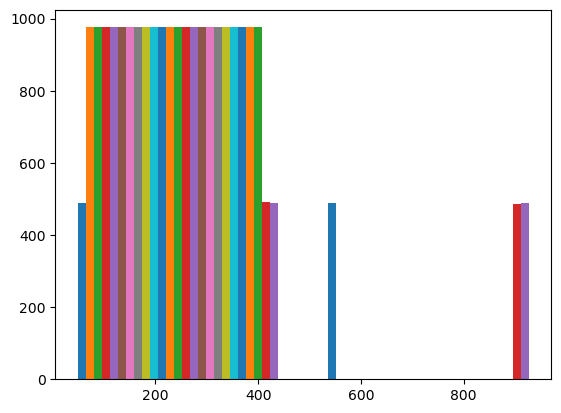

In [11]:
plt.hist(feature, bins=2)
plt.show()

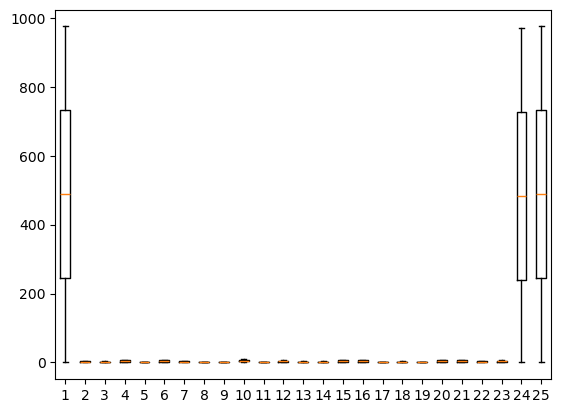

In [12]:
plt.boxplot(feature)
plt.show()

<Axes: >

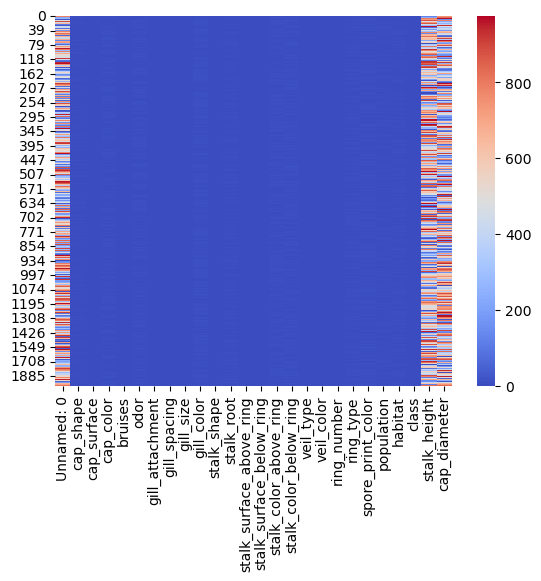

In [13]:
df_encoded.drop('class',axis=1)
sns.heatmap(df_encoded,cmap='coolwarm')

## Task 2:
Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [7]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
lab_enc = LabelEncoder()
for col in df_encoded.columns:
  df_encoded[col] = lab_enc.fit_transform(df_encoded[col])
df_encoded.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [8]:
target = df_encoded['class']
feature = df_encoded.drop('class',axis = 1)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 25)
(244, 25)
(732,)
(244,)


### Task 3: 
Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.


In [ ]:
sns.pairplot(data = df_encoded)

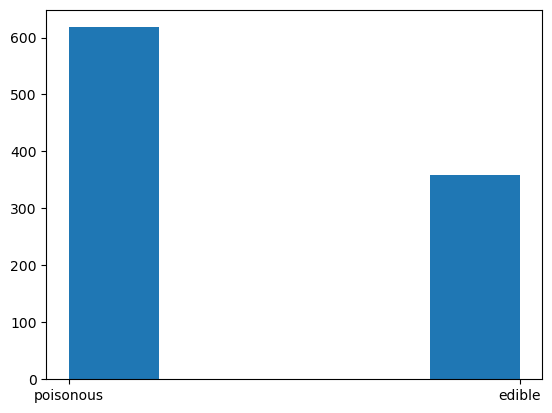

In [14]:
plt.hist(df['class'],bins = 5)
plt.show()

## Task 4:
SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [15]:
svc = SVC(C=1,kernel='linear',gamma=0.1)

In [16]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [17]:
y_pred = svc.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.5901639344262295

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



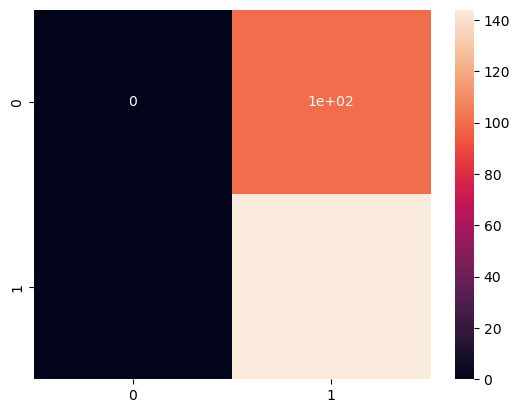

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))

## Task 5:
Visualization of SVM Results

1.	Visualize classification results on the testing data.


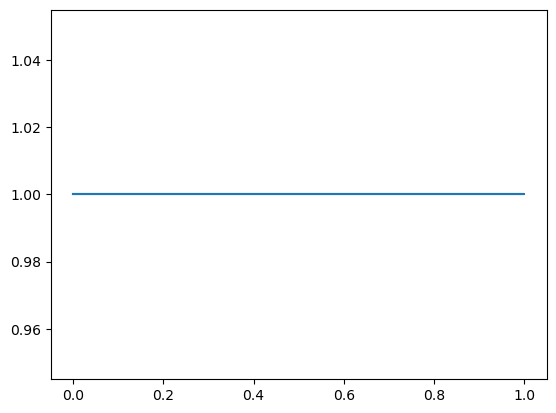

In [20]:
plt.plot(y_test,y_pred)

## Task 6: 
Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [21]:
svc_linear = SVC(C=5,kernel='linear',gamma=0.1)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [22]:
svc_linear = SVC(C=10,kernel='linear')
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [23]:
svc_linear = SVC(C=15,kernel='linear')
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [24]:
svc_linear = SVC(C=20,kernel='linear')
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

### 
The accuracy of the model remains the exact same even if we change the hyperarameter(C)

## Task 7: 
Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

3.	Discuss practical implications of SVM in real-world classification tasks.


In [25]:
svc_linear = SVC(C=1,kernel='linear',gamma=0.1)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
svc_poly = SVC(C=1,kernel='poly',gamma=0.1)
svc_poly.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

In [26]:
svc_rbf = SVC(C=1,kernel='rbf',gamma=0.1)
svc_rbf.fit(x_train,y_train)
y_pred = svc_rbf.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [27]:
svc_sig = SVC(C=1,kernel='sigmoid',gamma=0.1)
svc_sig.fit(x_train,y_train)
y_pred = svc_sig.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

<Axes: xlabel='class'>

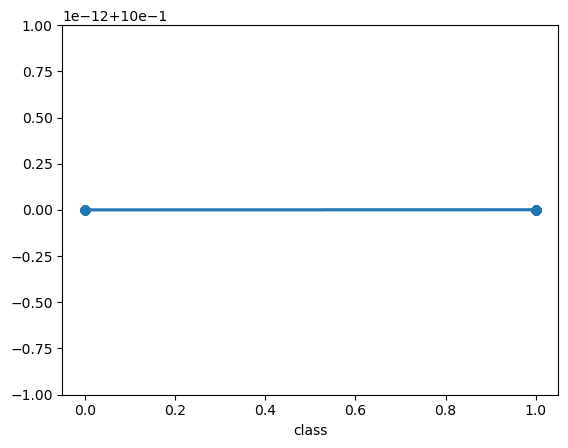

In [28]:
sns.regplot(data = df_encoded, x=y_test, y=y_pred)

### 
The real-world classification of SVM due to several reasons:
1. High accuracy
2. Versatile with kernel functions
3. Handiling imbalanced data
4. Robustness
5. Effectie in handling various types of data complexities and distributions.